In [1]:
##1(a)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('../data/communities.csv',names = ["state","county","community","communityname", "fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"])

In [2]:
train = data[:1495]
train.reset_index(drop=True,inplace=True)
test = data[1495:]
test.reset_index(drop=True,inplace=True)


In [3]:
##1(b)
import numpy as np
from sklearn.impute import SimpleImputer
train.drop(['communityname','state','county','community','fold'], axis=1, inplace=True)
train = train.replace('?',np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train = pd.DataFrame(imp.fit_transform(train), columns=train.columns)


In [4]:
test.drop(['communityname','state','county','community','fold'], axis=1, inplace=True)
test = test.replace('?',np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
test = pd.DataFrame(imp.fit_transform(test), columns=test.columns)


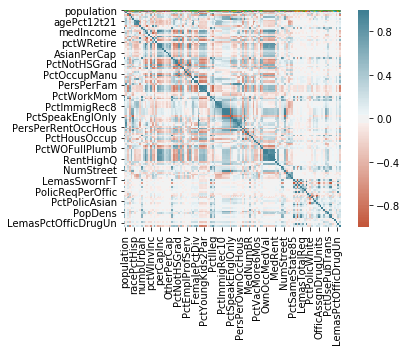

In [7]:
##1(c)
import seaborn as sns
import matplotlib.pyplot as plt
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.plot(corr)

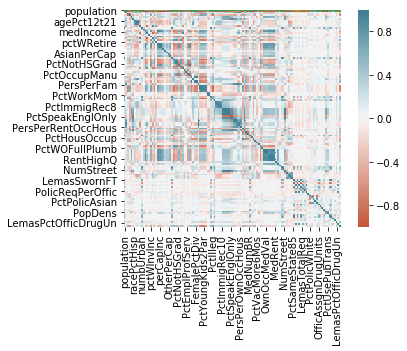

In [6]:
corr = test.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.plot(corr)

In [7]:
##1(d)
##references: https://www.geeksforgeeks.org/program-coefficient-variation/
cv = {}
for i in train.columns:
    sd = np.std(train[i])
    mean = np.mean(train[i])
    CV = sd/mean
    cv[i]=CV
cv   
    

{'population': 2.2403549658791597,
 'householdsize': 0.35568054998665144,
 'racepctblack': 1.4284074506092626,
 'racePctWhite': 0.3301022059521659,
 'racePctAsian': 1.3586450597327822,
 'racePctHisp': 1.6115517541662496,
 'agePct12t21': 0.3689596593902993,
 'agePct12t29': 0.2912173646346089,
 'agePct16t24': 0.5001425558175222,
 'agePct65up': 0.41263790059202093,
 'numbUrban': 2.0377796181745684,
 'pctUrban': 0.6431029790755556,
 'medIncome': 0.5917801462174829,
 'pctWWage': 0.32850413414993196,
 'pctWFarmSelf': 0.7016630853607417,
 'pctWInvInc': 0.3652123768258215,
 'pctWSocSec': 0.36059478571863646,
 'pctWPubAsst': 0.7059696656048582,
 'pctWRetire': 0.34530541203430976,
 'medFamInc': 0.5404892966681876,
 'perCapInc': 0.5578927727889993,
 'whitePerCap': 0.5196545822676161,
 'blackPerCap': 0.5991400633159214,
 'indianPerCap': 0.8180943789334159,
 'AsianPerCap': 0.6146598515430145,
 'OtherPerCap': 0.6729964266659633,
 'HispPerCap': 0.48390602773265157,
 'NumUnderPov': 2.341659559375282,


['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


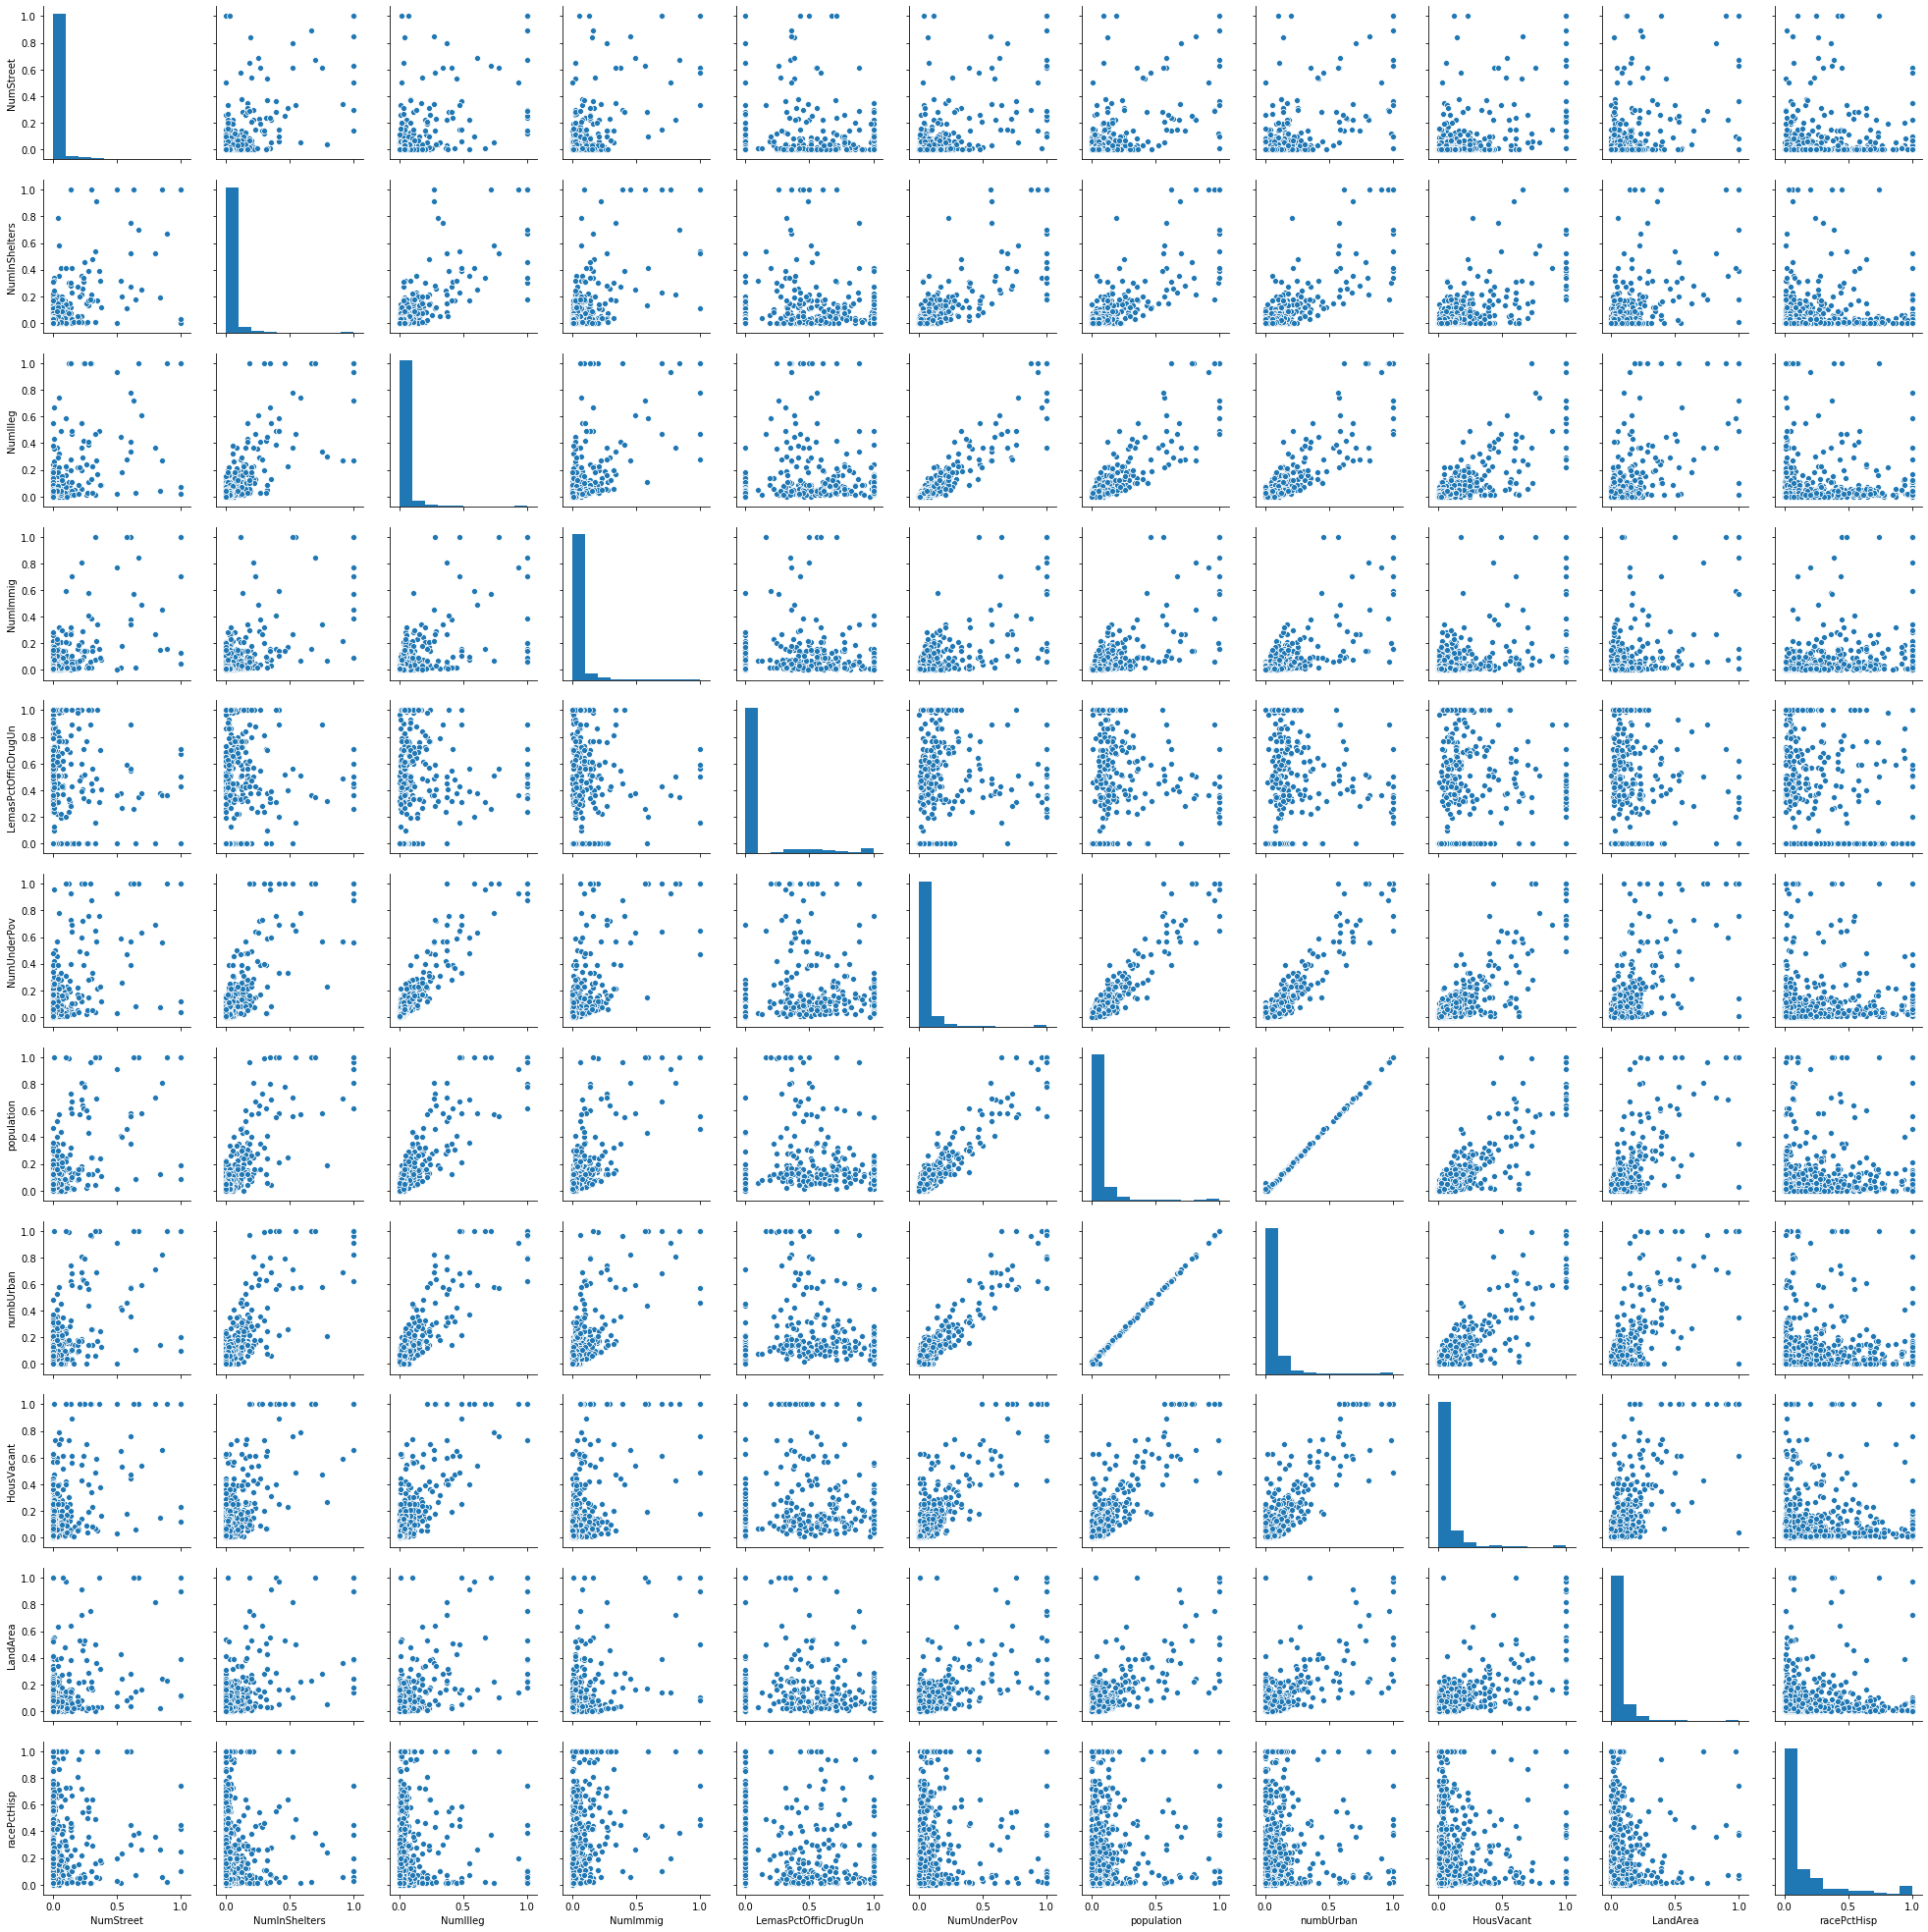

In [8]:
##1(e)
##sqrt(128)=11. so we pick 11 features.
highest_cv = sorted(cv,key=cv.get,reverse=True)[:11]
highest_cv
print(highest_cv)
data_e = train[highest_cv]
sns.pairplot(data_e)
##From pairplot, we discover that features are mutually correlated(or intercorrelated) tightly.

In [9]:
##1(e):make boxplot


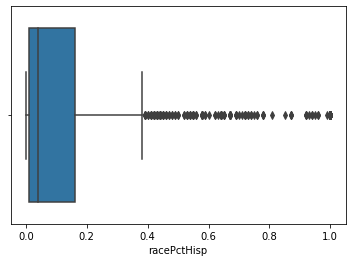

In [10]:
sns.boxplot((data_e['racePctHisp']))

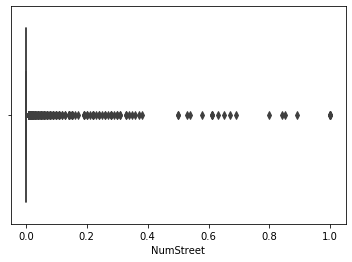

In [11]:
sns.boxplot((data_e['NumStreet']))

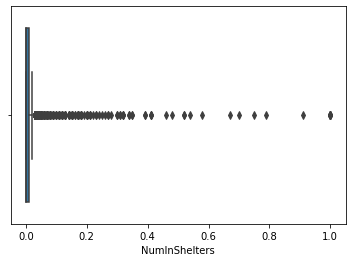

In [12]:
sns.boxplot((data_e['NumInShelters']))

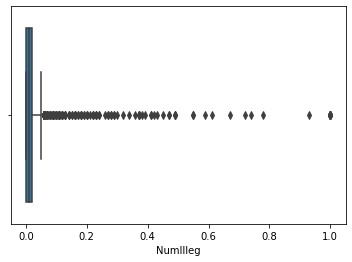

In [13]:
sns.boxplot((data_e['NumIlleg']))

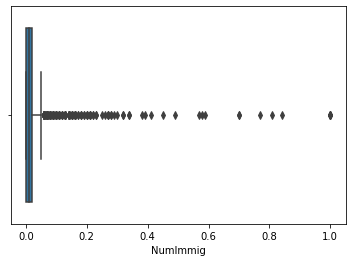

In [14]:
sns.boxplot((data_e['NumImmig']))

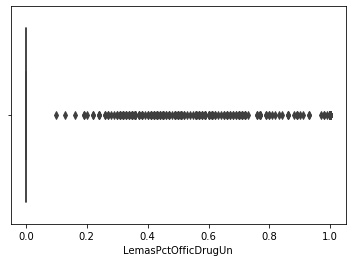

In [15]:
sns.boxplot((data_e['LemasPctOfficDrugUn']))

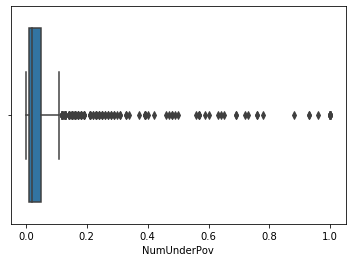

In [16]:
sns.boxplot((data_e['NumUnderPov']))

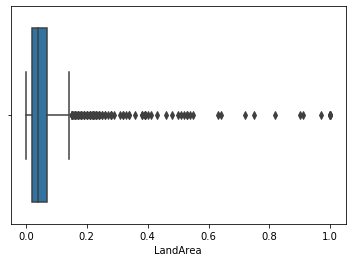

In [17]:
sns.boxplot((data_e['LandArea']))

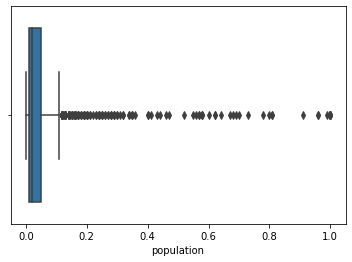

In [18]:
sns.boxplot((data_e['population']))

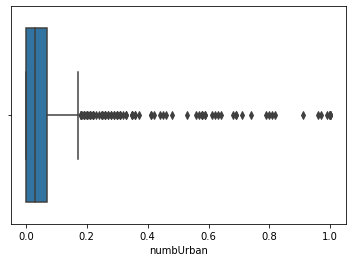

In [19]:
sns.boxplot((data_e['numbUrban']))

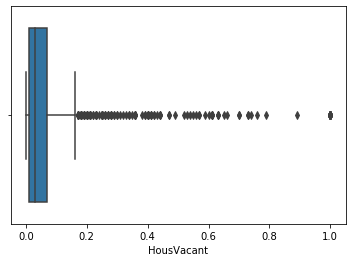

In [20]:
sns.boxplot((data_e['HousVacant']))

In [21]:
##1(f)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_train = train.drop("ViolentCrimesPerPop", axis=1)
y_train = train[['ViolentCrimesPerPop']]
x_test = test.drop("ViolentCrimesPerPop", axis=1)
y_test = test[['ViolentCrimesPerPop']]
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mse

0.018112462026533483

In [22]:
##1(g)
alphas = 10**np.linspace(10,-2,100)*0.5
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler


ridgecv = RidgeCV(cv=10,  normalize = True)
ridgecv.fit(x_train, y_train)
y_pred = ridgecv.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mse

0.017446434715325768

In [23]:
##1(h)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
##Reference: https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b
##Normalized lassocv mse
lassocv = LassoCV(cv=10,  normalize = True)
lassocv.fit(x_train, y_train)
y_pred = lassocv.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
sel_ = SelectFromModel(LassoCV(cv=10,normalize=True))
sel_.fit(x_train,y_train)
a = sel_.get_support()
feature = []
for key,value in enumerate(x_train.columns):
    if a[key] == True:
        feature.append(value)
print(feature)


0.017824214871232473
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'PolicReqPerOffic', 'RacialM

In [24]:
##1(h):unnormalized lassocv mse
lassocv_unnormalized = LassoCV(cv=10,  normalize = False)
lassocv_unnormalized.fit(x_train, y_train)
y_pred_unnormalized = lassocv_unnormalized.predict(x_test)
mse_unnormalized = mean_squared_error(y_test,y_pred_unnormalized)
print(mse_unnormalized)
sel_ = SelectFromModel(LassoCV(cv=10,normalize=False))
sel_.fit(x_train,y_train)
a = sel_.get_support()
feature = []
for key,value in enumerate(x_train.columns):
    if a[key] == True:
        feature.append(value)
print(feature)

0.01774934769131434
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'Pct

In [25]:
##1(h):compare test error: they are basically same, it seems like whether dataset is normalized or not does not
##affect test error too much.

In [26]:
##1(i):
##referece:http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn import model_selection
pca = PCA()
##Train_x = np.array(x_train)
x_reduced = pca.fit_transform(scale(np.array(x_train)))
n = len(x_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
regr = LinearRegression()
mse = []
##Train_y = np.array(y_train)
# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), np.array(y_train).ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
print(mse)
# Calculate MSE using CV for the 122 principle components, adding one component at the time.
for i in np.arange(1, 123):
    score = -1*model_selection.cross_val_score(regr, x_reduced[:,:i],np.array(y_train).ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
print(mse)
print(min(mse))

##so, we know smallest mse is 0.01967612788720803, with location index = 95. mse gradually increase when index>95 , which amounts to simply performing least squares, because when all of the components are used in PCR no dimension reduction occurs

[0.05651680324214936]
[0.05651680324214936, 0.03325117550223693, 0.029435754125627277, 0.028320863568316118, 0.028394516751149408, 0.026243513646474204, 0.0263030059923423, 0.02588015092424505, 0.021988911377254054, 0.021174766692770935, 0.021128798972276784, 0.021143719051565264, 0.021219806538883133, 0.020988918769664612, 0.021027232378823053, 0.02103838521265823, 0.02102465977909575, 0.02089918013575893, 0.020624553595996055, 0.020701055693225077, 0.020720825698302435, 0.02075683241462954, 0.020691583379782438, 0.020726278509309824, 0.02073833417789483, 0.020747445933013663, 0.020766220706051667, 0.020484211791615227, 0.02042642265613771, 0.020430812208882387, 0.02046274779433853, 0.020177953754655996, 0.020233661582144867, 0.020242137735884135, 0.020250552941689925, 0.020300775470118302, 0.020328908631987185, 0.02032320034191865, 0.020332958806222913, 0.02037201023561935, 0.020372819752309805, 0.020460306453479214, 0.020379863472552665, 0.02036818508591543, 0.020237276292212482, 0.

In [27]:
##1(i)continued:
x_reduced_test = pca.fit_transform(scale(np.array(x_test)))[:,:96]
regressor = LinearRegression()
regressor.fit(x_reduced[:,:96], y_train)
pred = regressor.predict(x_reduced_test)
mean_squared_error(y_test, pred)
##output is test error

0.0262640767947549

In [30]:
##1(j)
!pip install xgboost
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
alpha_dict = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.5,1,2,5,10,100,1000,5000,10000] }
model = XGBRegressor()
best_cv = GridSearchCV(estimator = model, param_grid = alpha_dict).fit(x_train,y_train)
Best = best_cv.best_params_
Best
##For this question, I choose some alpha value [0.0001,0.001,0.01,0.05,0.1,0.5,1,2,5,10,100,1000,5000,10000], and get best alpha 2 using cross validation.


{'alpha': 2}

In [8]:
##2(a):
training = pd.read_csv('../data/aps_failure_training_set.csv',skiprows=20)
testing = pd.read_csv('../data/aps_failure_test_set.csv',skiprows=19)                  

In [9]:
##2(b)i
##Below are common imputation ways to handle missing data.
##Mean imputation. Simply calculate the mean of the observed values for that variable for all individuals who are non-missing
##Hot deck imputation
##Cold deck imputation
##Regression imputation
##Stochastic regression imputation

##I will choose mean imputation.

In [10]:
import numpy as np
x_training = training.drop("class", axis=1)
y_training = training[["class"]]
x_testing = testing.drop("class", axis=1)
y_testing = testing[["class"]]
x_training = x_training.replace('na',np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_training = pd.DataFrame(imp.fit_transform(x_training), columns=x_training.columns)

In [56]:
x_testing = x_testing.replace('na',np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_testing = pd.DataFrame(imp.fit_transform(x_testing), columns=x_testing.columns)

In [57]:
##2(b)ii
cv_2 = {}
for i in x_training.columns:
    sd = np.std(x_training[i])
    mean = np.mean(x_training[i])
    CV = sd/mean
    cv_2[i]=CV
cv_2   

{'aa_000': 2.450917153379079,
 'ab_000': 2.3283805836177702,
 'ac_000': 2.1697484418139323,
 'ad_000': 183.8460882991141,
 'ae_000': 23.190743406968053,
 'af_000': 18.65876560436062,
 'ag_000': 91.87779897147188,
 'ag_001': 34.854659618594006,
 'ag_002': 17.368998661424822,
 'ag_003': 8.549977775999249,
 'ag_004': 5.401433682911794,
 'ag_005': 2.9270676898901256,
 'ag_006': 2.3449075291972563,
 'ag_007': 2.833460478469983,
 'ag_008': 6.154531790145528,
 'ag_009': 32.98407617059891,
 'ah_000': 2.3001680803073827,
 'ai_000': 18.01253163815488,
 'aj_000': 43.801457366011356,
 'ak_000': 74.52606690027996,
 'al_000': 9.074295202585027,
 'am_0': 9.058596116868644,
 'an_000': 2.238778117662783,
 'ao_000': 2.2601302821582165,
 'ap_000': 3.0591388134967334,
 'aq_000': 2.8395880298360754,
 'ar_000': 10.836959393081017,
 'as_000': 86.4161836966494,
 'at_000': 23.45922929479404,
 'au_000': 68.15998600570832,
 'av_000': 5.7787367533464895,
 'ax_000': 3.8775360254410027,
 'ay_000': 37.00925391275805

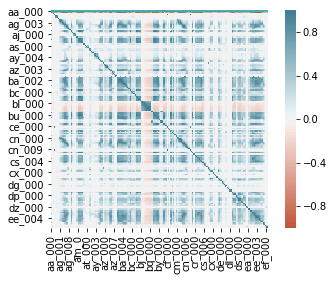

In [58]:
##2(b)iii
corr = x_training.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.plot(corr)

['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000']


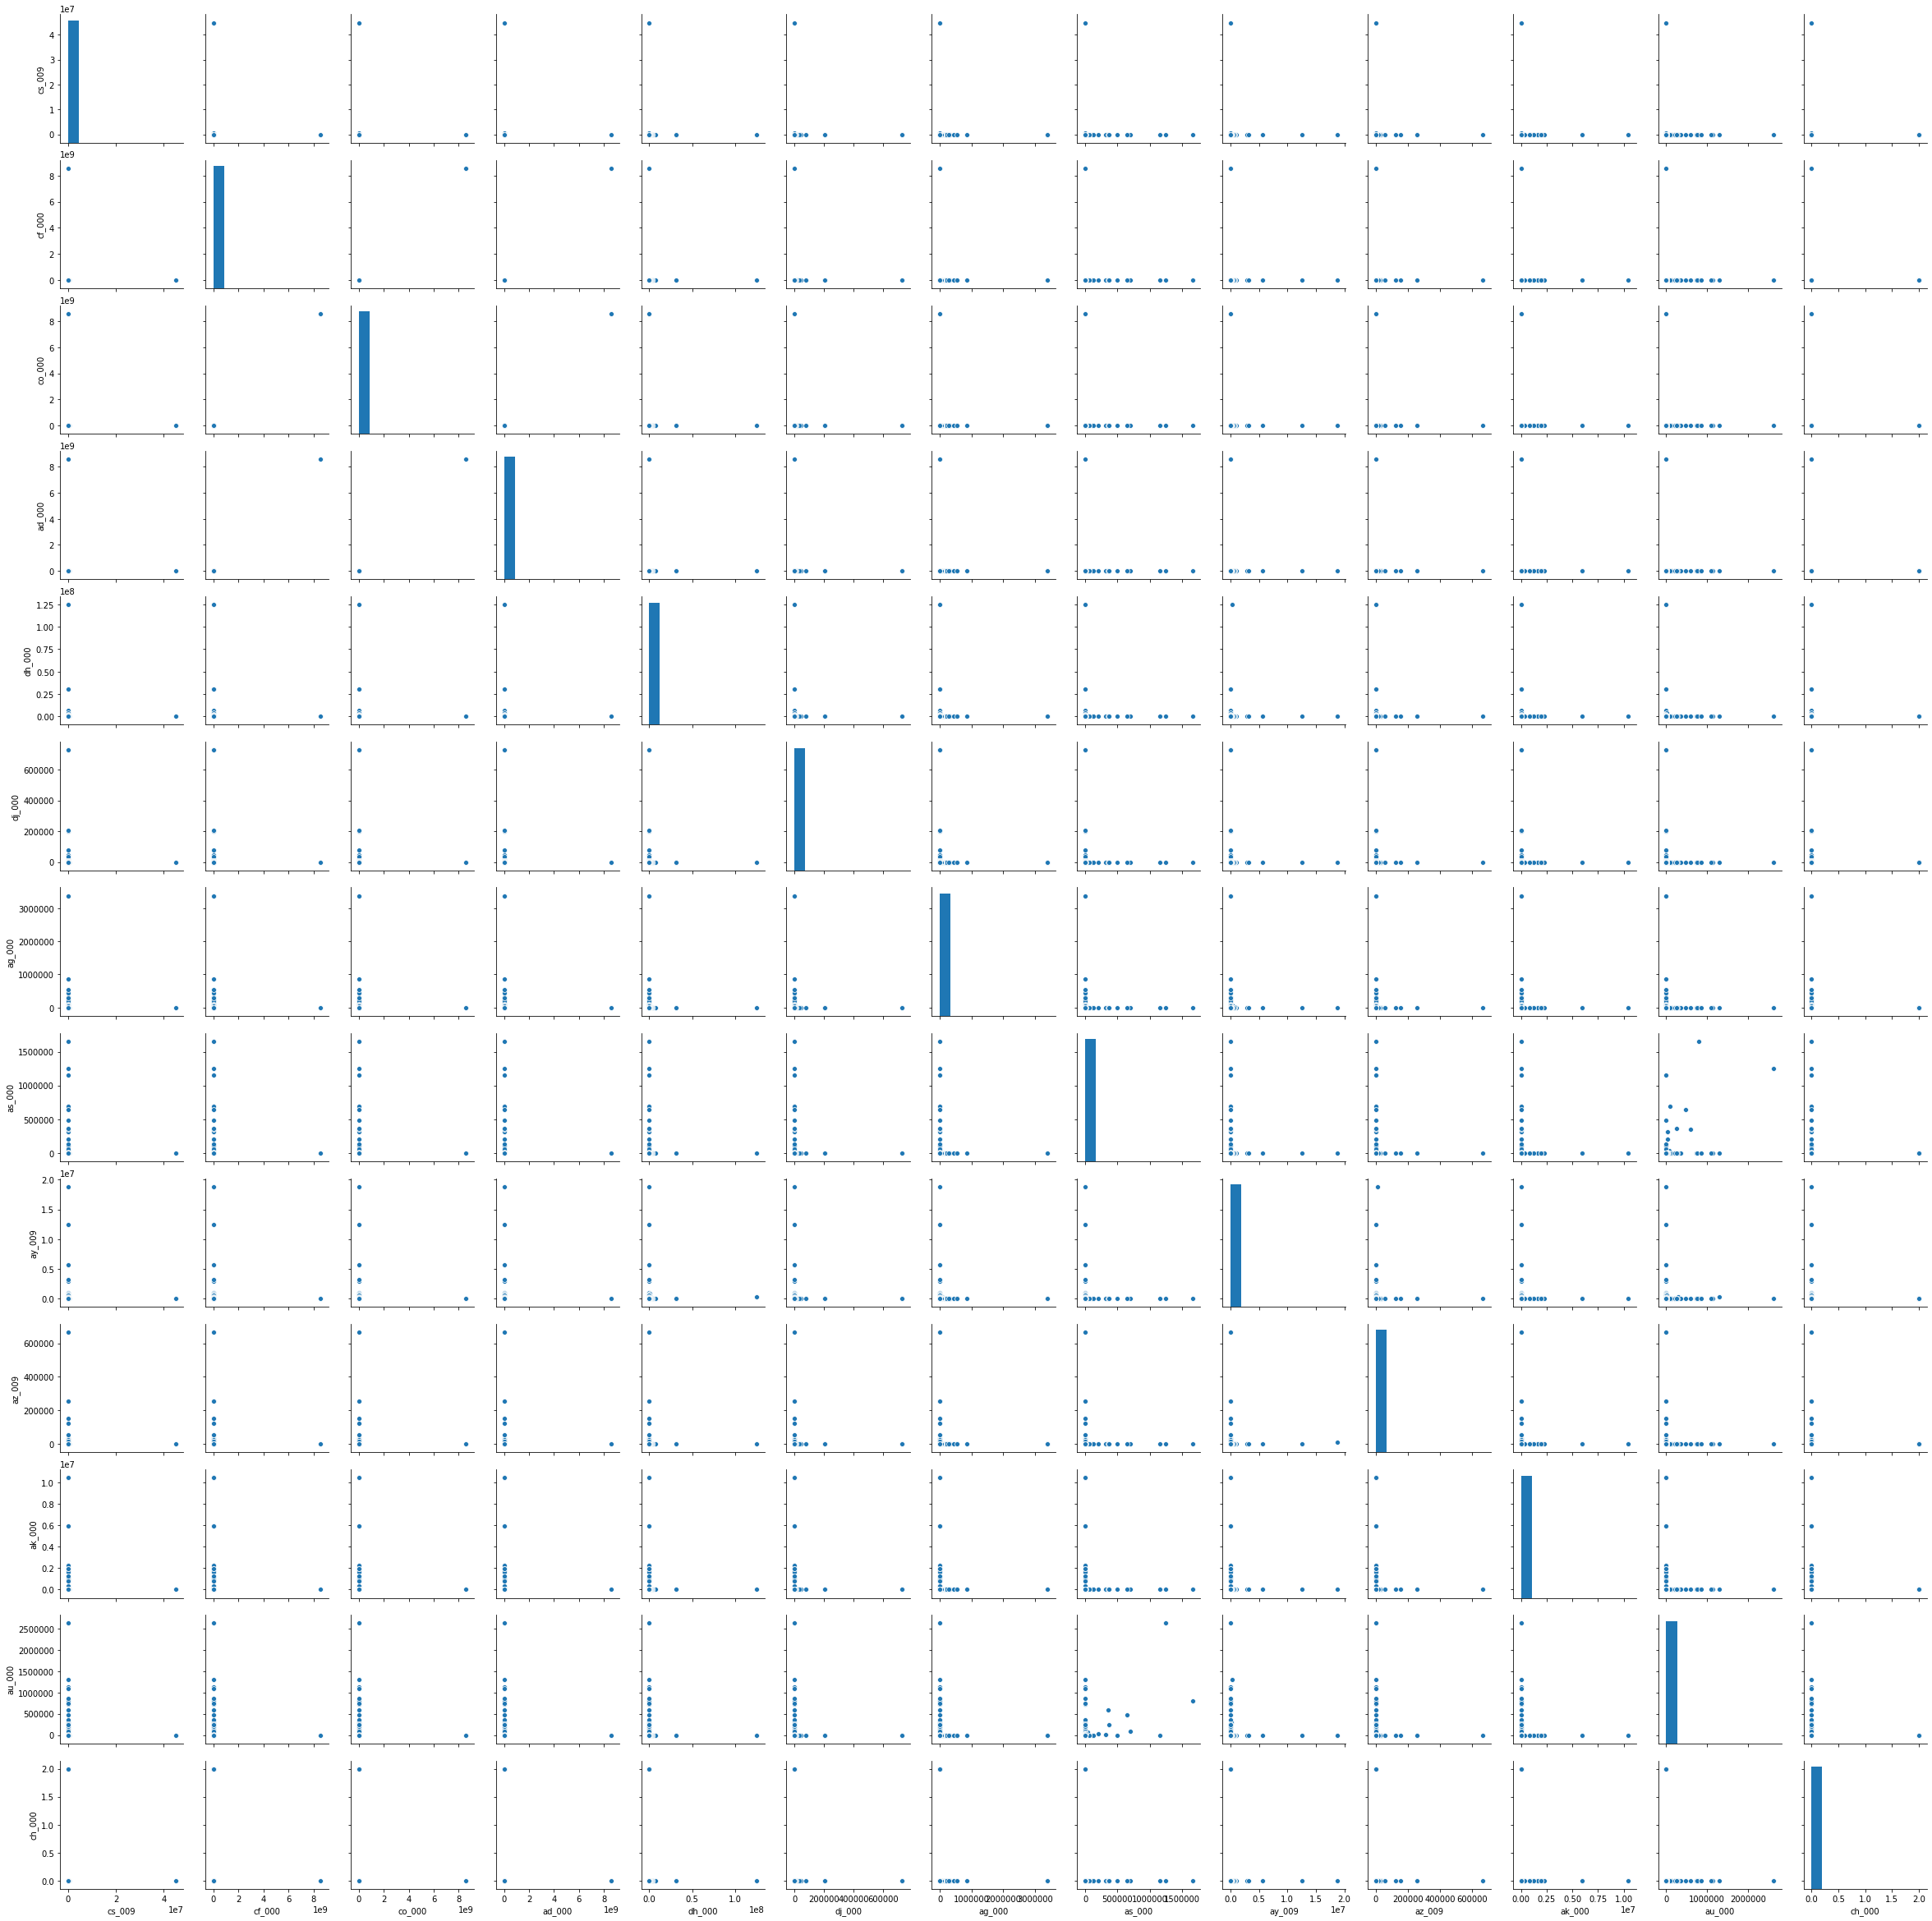

In [59]:
##2(b)iv
##sqrt(170)=13. so we pick 11 features.
highest_cv_2 = sorted(cv_2,key=cv_2.get,reverse=True)[:13]
highest_cv_2
print(highest_cv_2)
data_2b = x_training[highest_cv_2]
sns.pairplot(data_2b)
##from scatterplot, we can see that features are correlated tightly.

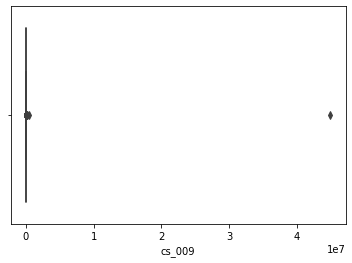

In [60]:
##make boxplot
import seaborn as sns
sns.boxplot(data_2b['cs_009'])

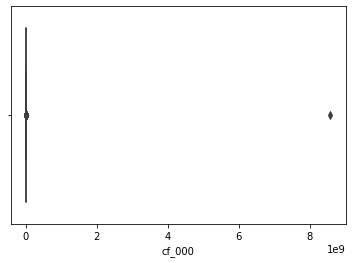

In [61]:
sns.boxplot(data_2b['cf_000'])

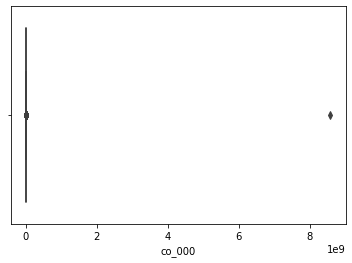

In [62]:
sns.boxplot((data_2b['co_000']))

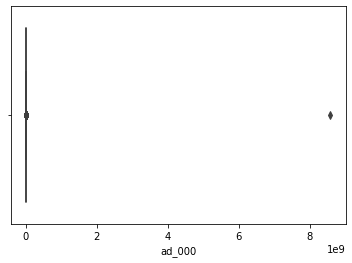

In [63]:
sns.boxplot(data_2b['ad_000'])

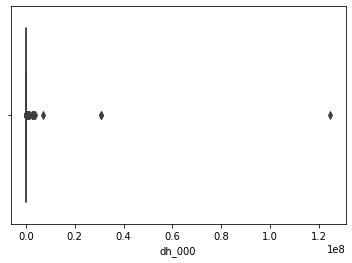

In [64]:
sns.boxplot(data_2b['dh_000'])

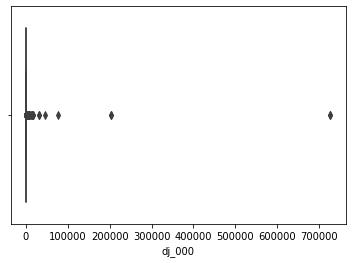

In [65]:
sns.boxplot(data_2b['dj_000'])

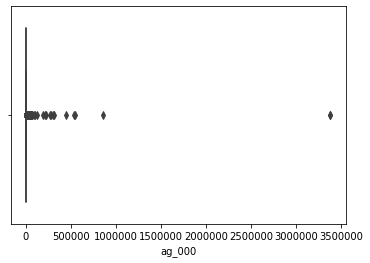

In [66]:
sns.boxplot(data_2b['ag_000'])

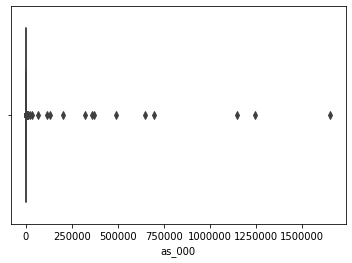

In [67]:
sns.boxplot(data_2b['as_000'])

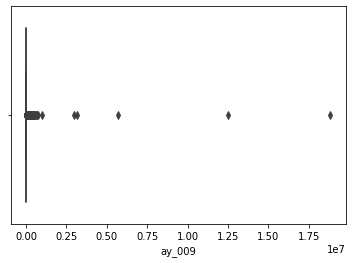

In [68]:
sns.boxplot(data_2b['ay_009'])

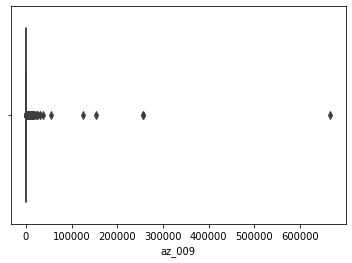

In [69]:
sns.boxplot(data_2b['az_009'])

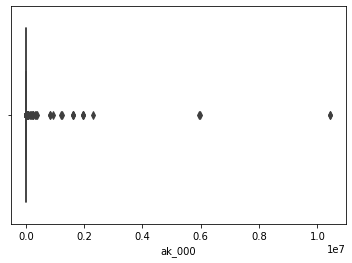

In [70]:
sns.boxplot(data_2b['ak_000'])

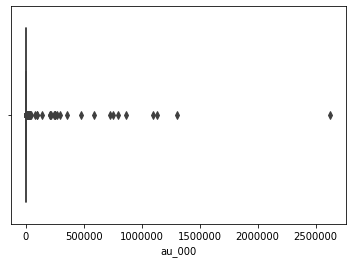

In [71]:
sns.boxplot(data_2b['au_000'])

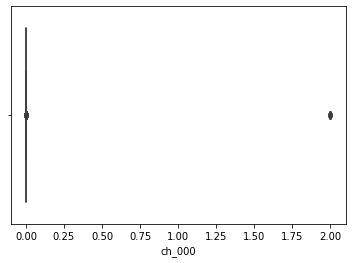

In [72]:
sns.boxplot(data_2b['ch_000'])

In [73]:
##2(b)v
training['class'].value_counts()
##There are 59000 neg class and 1000 pos class in training dataset. The difference between counts of pos and neg class is so large so dataset is highly imbalanced

neg    59000
pos     1000
Name: class, dtype: int64

In [74]:
testing['class'].value_counts()
##There are 15625 neg class and 375 pos class in testing dataset. The difference between counts of pos and neg class is so large so dataset is highly imbalanced

neg    15625
pos      375
Name: class, dtype: int64

In [75]:
##2(c)
##misclassification for training
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=123)
rf.fit(x_training,y_training)
score_training = rf.score(x_training,y_training)
misclassification_training = 1-score_training
print(misclassification_training)
##misclassification error for training is 0.0

0.0


In [76]:
##misclassification for testing
score_testing = rf.score(x_testing,y_testing)
misclassification_testing = 1-score_testing
print(misclassification_testing)
##misclassification error for training is 0.007687499999999958

0.007687499999999958


In [77]:
from sklearn.metrics import confusion_matrix
##confusion matrix for training
y_pred = rf.predict(x_training)
confusion_train = confusion_matrix(y_training, y_pred)
confusion_train

array([[59000,     0],
       [    0,  1000]], dtype=int64)

In [78]:
##confusion matrix for testing
y_pred_test = rf.predict(x_testing)
confusion_test = confusion_matrix(y_testing, y_pred_test)
confusion_test


array([[15609,    16],
       [  107,   268]], dtype=int64)

In [79]:
##roc,auc for training
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
binarizer = preprocessing.LabelBinarizer()
y_training = binarizer.fit_transform(y_training)
y_pred = binarizer.fit_transform(y_pred)
lw=2
fpr, tpr, thresholds = roc_curve(y_training, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

1.0

In [80]:
##roc,auc for testing
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
binarizer = preprocessing.LabelBinarizer()
y_testing = binarizer.fit_transform(y_testing)
y_pred_test = binarizer.fit_transform(y_pred_test)
lw=2
fpr, tpr, thresholds = roc_curve(y_testing, y_pred_test)
roc_auc = auc(fpr, tpr)
roc_auc

0.8568213333333333

In [87]:
##OOB score for training and testing
forest = RandomForestClassifier(n_estimators = 50, oob_score = True)
forest.fit(x_training, y_training)
print('Score for training: ', forest.score(x_training, y_training))
forest.fit(x_testing, y_testing)
print('Score for testing: ', forest.score(x_testing, y_testing))

Score for training:  0.9999833333333333
Score for testing:  1.0


In [88]:
##2(d)
##classification error for testing and traing for Balanced dataset 
rf_balanced = RandomForestClassifier(n_estimators=50, random_state=123,class_weight="balanced")
rf_balanced.fit(x_training,y_training)
score_training = rf_balanced.score(x_training,y_training)
misclassification_training = 1-score_training
print(misclassification_training)
##misclassification error for training is 0.0
score_testing = rf_balanced.score(x_testing,y_testing)
misclassification_testing = 1-score_testing
print(misclassification_testing)
##misclassification error for testing is 0.011312499999999948


##OOB score for training and testing in balanced dataset
forest = RandomForestClassifier(n_estimators = 50, oob_score = True)
forest.fit(x_training, y_training)
print('Score for training: ', forest.score(x_training, y_training))
forest.fit(x_testing, y_testing)
print('Score for testing: ', forest.score(x_testing, y_testing))


1.666666666666483e-05
0.01100000000000001
Score for training:  0.9999666666666667
Score for testing:  1.0


In [83]:
##confusion matrix for training  in balanced dataset
y_pred = rf_balanced.predict(x_training)
confusion_train = confusion_matrix(y_training, y_pred)
confusion_train

array([[59000,     0],
       [    1,   999]], dtype=int64)

In [84]:
##confusion matrix for testing  in balanced dataset
y_pred_test = rf_balanced.predict(x_testing)
confusion_test = confusion_matrix(y_testing, y_pred_test)
confusion_test

array([[15613,    12],
       [  164,   211]], dtype=int64)

In [85]:
##roc,auc for training in balanced dataset
binarizer = preprocessing.LabelBinarizer()
y_training = binarizer.fit_transform(y_training)
y_pred = binarizer.fit_transform(y_pred)
lw=2
fpr, tpr, thresholds = roc_curve(y_training, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)


0.9995


In [86]:
##roc,auc for testing in balanced dataset
binarizer = preprocessing.LabelBinarizer()
y_testing = binarizer.fit_transform(y_testing)
y_pred_test = binarizer.fit_transform(y_pred_test)
lw=2
fpr, tpr, thresholds = roc_curve(y_testing, y_pred_test)
roc_auc = auc(fpr, tpr)
roc_auc

0.7809493333333333

In [70]:
## we discover that roc_auc, confusion matrix, classification error
## in unbalanced dataset is a little bit more desired.(classification error is lower,roc_auc is higher,but differences is small)

In [79]:
##2(e)
import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"
!apt-get install build-essential python3-dev
!apt-get install python3-pil python3-pygraphviz
!apt install openjdk-11-jdk
!pip3 install javabridge --no-cache-dir
!pip3 install python-weka-wrapper3 --no-cache-dir

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pil is already the newest version (5.1.0-1ubuntu0.3).
python3-pygraphviz is already the newest version (1.4~rc1-1build2.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.8+10-0ubuntu1~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [72]:
import weka.core.converters as converters
import weka.core.jvm as jvm

In [73]:

jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.6/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [90]:
##using weka on training dataset

!pip3 install javabridge
import weka.core.converters as converters
training_weka = pd.read_csv('../data/train_weka.csv')
from weka.classifiers import Classifier
train_data = converters.load_any_file("/content/drive/My Drive/train_weka.csv")
train_data.class_is_first()
classifier = Classifier(classname="weka.classifiers.trees.LMT")
from weka.classifiers import Evaluation
from weka.core.classes import Random
eva = Evaluation(train_data)
eva.crossvalidate_model(classifier=classifier,data=train_data, num_folds = 5, rnd=Random(123))


In [93]:

print(eva.summary())
print(eva.confusion_matrix)
##test error: 1.2%


Correctly Classified Instances        4940               98.8    %
Incorrectly Classified Instances        60                1.2    %
Kappa statistic                          0.6143
Mean absolute error                      0.0152
Root mean squared error                  0.098 
Relative absolute error                 43.2759 %
Root relative squared error             74.0817 %
Total Number of Instances             5000     

[[4891.   20.]
 [  40.   49.]]


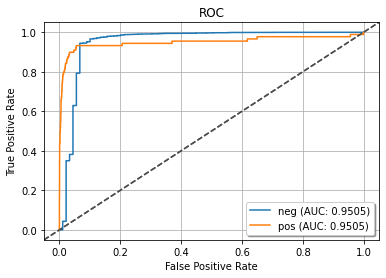

In [94]:
import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_roc(eva, class_index=[0, 1], wait=True)

In [99]:
##using weka on test dataset

!pip3 install javabridge

test_data = converters.load_any_file('../data/test_weka.csv')
test_data.class_is_first()
classifier = Classifier(classname="weka.classifiers.trees.LMT")
from weka.classifiers import Evaluation
from weka.core.classes import Random
evall = Evaluation(test_data)
evall.crossvalidate_model(classifier=classifier,data=test_data, num_folds = 5, rnd=Random(123))

In [100]:
print(evall.summary())
print(evall.confusion_matrix)
##test error: 1.42%
##test error and train error are barely different, they are all so small that only not exceed 2%.


Correctly Classified Instances        4929               98.58   %
Incorrectly Classified Instances        71                1.42   %
Kappa statistic                          0.688 
Mean absolute error                      0.0176
Root mean squared error                  0.1069
Relative absolute error                 36.7239 %
Root relative squared error             69.3167 %
Total Number of Instances             5000     

[[4848.   30.]
 [  41.   81.]]


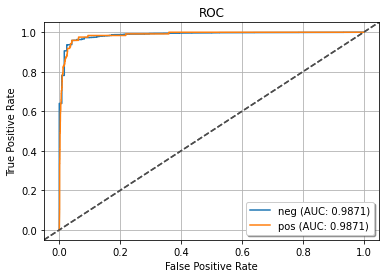

In [101]:
import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_roc(eval, class_index=[0, 1], wait=True)

In [107]:
##2(f)
!pip3 install javabridge

smote_train_data = converters.load_any_file('../data/smote_train_weka.csv')
smote_train_data.class_is_first()
classifier = Classifier(classname="weka.classifiers.trees.LMT")
from weka.classifiers import Evaluation
from weka.core.classes import Random
smote_train_eval = Evaluation(smote_train_data)
smote_train_eval.crossvalidate_model(classifier=classifier,data=smote_train_data, num_folds = 5, rnd=Random(123))


In [108]:
print(smote_train_eval.summary())
print(smote_train_eval.confusion_matrix)
##test error: 0.9978%


Correctly Classified Instances        9724               99.0022 %
Incorrectly Classified Instances        98                0.9978 %
Kappa statistic                          0.98  
Mean absolute error                      0.0175
Root mean squared error                  0.0917
Relative absolute error                  3.5021 %
Root relative squared error             18.3337 %
Total Number of Instances             9822     

[[4843.   68.]
 [  30. 4881.]]


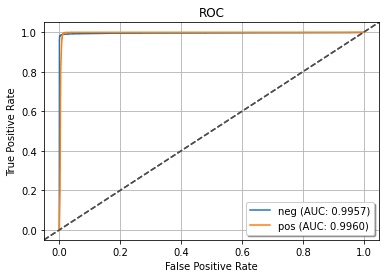

In [109]:
plcls.plot_roc(smote_train_eval, class_index=[0, 1], wait=True)

In [110]:
!pip3 install javabridge

smote_test_data = converters.load_any_file('../data/smote_test_weka.csv')
smote_test_data.class_is_first()
classifier = Classifier(classname="weka.classifiers.trees.LMT")
from weka.classifiers import Evaluation
from weka.core.classes import Random
smote_test_eval = Evaluation(smote_test_data)
smote_test_eval.crossvalidate_model(classifier=classifier,data=smote_test_data, num_folds = 5, rnd=Random(123))

In [111]:
print(smote_test_eval.summary())
print(smote_test_eval.confusion_matrix)
##test error:0.8713%


Correctly Classified Instances        9671               99.1287 %
Incorrectly Classified Instances        85                0.8713 %
Kappa statistic                          0.9826
Mean absolute error                      0.0197
Root mean squared error                  0.0921
Relative absolute error                  3.9394 %
Root relative squared error             18.4199 %
Total Number of Instances             9756     

[[4810.   68.]
 [  17. 4861.]]


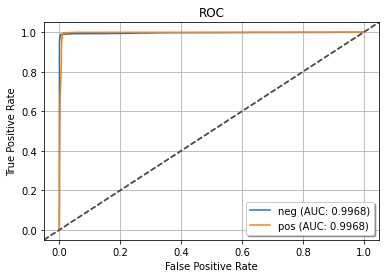

In [112]:
plcls.plot_roc(smote_test_eval, class_index=[0, 1], wait=True)
##the difference between train data and test data's test error barely different. They all are very small, less than 1%. and they are all a little bit
##smaller than test error in data without smote. 

In [ ]:
##ISLR 6.8.3
##(a): iv is correct. Since s is gradually increasing, so we are restricting βj less and less. Thus, the model become more flexible and training RSS keep decreasing.
##(b): ii is correct. Since s is gradually increasing, so we are restricting βj less and less. Model is more flexible which decrease testing RSS.
##However, if training RSS are too low, overfitting occurs.So testing RSS increase after certain point.
##(C): iii is correct. Since s is gradually increasing, so we are restricting βj less and less. When production or prediction
## too close to the training data, overfitting occur, which keep increase variance.
##(d): iv is correct. Since s is gradually increasing, so we are restricting βj less and less. Models become more flexible
## and will fit more training data. Thus bias are keep decreasing.
##(e): v is correct since irreducible error is independent with model.

In [ ]:
##ISLR 6.8.5
##(a):Since β0 = 0. Under such case, RSS in ridge is (y1-β1x1-β2x1)^2+(y2-β1x2-β2x2)^2.ridge regression coefficient estimates β^R are the values that minimize
##Rss+λ(β1^2+β2^2), which equals (y1-β1x1-β2x1)^2+(y2-β1x2-β2x2)^2 + λ(β1^2+β2^2). That is optimization.
##(b):Since we want to optimize above formulas, so we take deriative of it and deriative value should equal 0.
## so ((y1-β1x1-β2x1)^2+(y2-β1x2-β2x2)^2 + λ(β1^2+β2^2))' = 2(y1-β1x1-β2x1)+2(y2-β1x2-β2x2)+λ(2β1+2β2) = 0
## when βˆ1 = βˆ2, above formula equals to 0.
##(C): (y1−β^1x1−β^2x1)2+(y2−β^1x2−β^2x2)2+λ(|β^1|+|β^2|)
##(d): Above formula are subject to |β^1|+|β^2|≤s. Since y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0,
## plug into (C) and we can get 2[y1−(β^1+β^2)x1]2≥0.To optimize it.just let 2[y1−(β^1+β^2)x1]2 = 0,
## so β^1+β^2 = y1/x1. This is a line parallel to the edge of Lasso-diamond βˆ 1 +βˆ2 = s, as β^1+β^2 vary along
## the line y1/x1. It can touch lasso diamond shape β^1+β^2 =s at different point. So lasso has many optimization solution.



In [126]:
##ISLR 8.4.5
##Majority vote: we classify X as red since there are more than half (6 times) the red probability is larger than 0.5
##Average probability:
avg_red_prob = (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10
avg_red_prob
##we will classify X as green since avg_green_prob is larger than 0.5 (1-0.45=0.55)

0.45

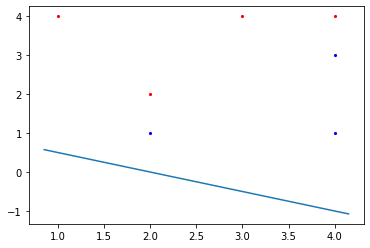

In [127]:
##ISLR 9.7.3
##(a):
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np


# values of x1 
x1 = [3, 2, 4, 1, 2, 4, 4]
  
# values of x2 
x2 = [4, 2, 4, 4, 1, 3, 1]
  
col =["red", "red", "red", "red", "blue", "blue", "blue"] 

for i in range(len(x1)): 
    plt.scatter(x1[i], x2[i], c = col[i], s = 10, linewidth = 0)     
def abline(slope, intercept):
    GCA = plt.gca()
    x = np.array(GCA.get_xlim())
    y = intercept + slope * x
    plt.plot(x, y)
abline(-(0.5), 1)
##(b)
##optimal hyperplane is between (2,1) and(2,2) and between (4,3) and (4,4).so the line across(2,1.5) and (4,3.5) is the best.
## so equation is X2=-0.5 +X1
    


In [128]:
##(c)
##Classify to Red if X1−X2−0.5<0, and classify to Blue ifX1−X2−0.5>0. For β0, β1, β2, their corresponding value is -0.5,1,-1

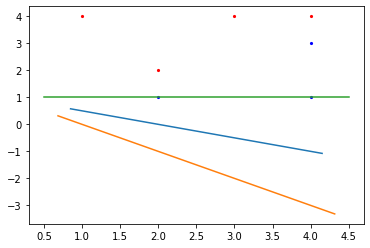

In [129]:
##(d)

# values of x1 
x1 = [3, 2, 4, 1, 2, 4, 4]
  
# values of x2 
x2 = [4, 2, 4, 4, 1, 3, 1]
  
col =["red", "red", "red", "red", "blue", "blue", "blue"] 

for i in range(len(x1)): 
    plt.scatter(x1[i], x2[i], c = col[i], s = 10, linewidth = 0)     
def abline(slope, intercept):
    GCA = plt.gca()
    x = np.array(GCA.get_xlim())
    y = intercept + slope * x
    plt.plot(x, y)
abline(-(0.5), 1)
abline(-1, 1)
abline(0, 1)

In [130]:
##(e)
##(2,1), (2,2), (4,3) (4,4)

In [ ]:
##(f)
##since(4,1) is far away from margin and support vector,so a slight movement of the seventh observation would not affect the maximal margin hyperplane

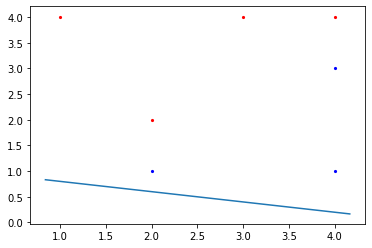

In [51]:
##(g)

# values of x1 
x1 = [3, 2, 4, 1, 2, 4, 4]
  
# values of x2 
x2 = [4, 2, 4, 4, 1, 3, 1]
  
col =["red", "red", "red", "red", "blue", "blue", "blue"] 

for i in range(len(x1)): 
    plt.scatter(x1[i], x2[i], c = col[i], s = 10, linewidth = 0)     
def abline(slope, intercept):
    GCA = plt.gca()
    x = np.array(GCA.get_xlim())
    y = intercept + slope * x
    plt.plot(x, y)
abline(-(0.2), 1)
##corresponding equation is X1−X2−0.2=0
##

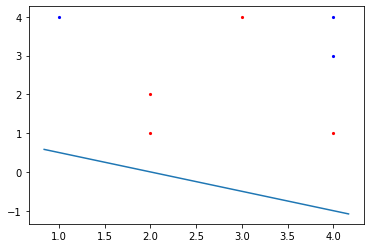

In [52]:
##(h)

##Here is example in which two classes are no longer separable by a hyperplane.

# values of x1 
x1 = [3, 2, 4, 1, 2, 4, 4]
  
# values of x2 
x2 = [4, 2, 4, 4, 1, 3, 1]
  
col =["red", "red", "blue", "blue", "red", "blue", "red"] 

for i in range(len(x1)): 
    plt.scatter(x1[i], x2[i], c = col[i], s = 10, linewidth = 0)     
def abline(slope, intercept):
    GCA = plt.gca()
    x = np.array(GCA.get_xlim())
    y = intercept + slope * x
    plt.plot(x, y)
abline(-(0.5), 1)
